In [1]:
import pandas as pd

In [4]:
data = pd.read_csv('../artifacts/flipkart_product_review.csv')

In [ ]:
# langchain
# langchain-community
# langchain-astradb
# langchain-groq
# pypdf

In [5]:
data.head()

,product_id,product_title,rating,summary,review
0,ACCFZGAQJGYCYDCM,BoAt Rockerz 235v2 with ASAP charging Version ...,5,Terrific purchase,1-more flexible2-bass is very high3-sound clar...
1,ACCFZGAQJGYCYDCM,BoAt Rockerz 235v2 with ASAP charging Version ...,5,Terrific purchase,Super sound and good looking I like that prize
2,ACCFZGAQJGYCYDCM,BoAt Rockerz 235v2 with ASAP charging Version ...,5,Super!,Very much satisfied with the device at this pr...
3,ACCFZGAQJGYCYDCM,BoAt Rockerz 235v2 with ASAP charging Version ...,5,Super!,"Nice headphone, bass was very good and sound i..."
4,ACCFZGAQJGYCYDCM,BoAt Rockerz 235v2 with ASAP charging Version ...,5,Terrific purchase,Sound quality super battery backup super quali...


In [6]:
data.columns

Index(['product_id', 'product_title', 'rating', 'summary', 'review'], dtype='object')

In [7]:
data = data[['product_title', 'review']]

In [8]:
data.head()

,product_title,review
0,BoAt Rockerz 235v2 with ASAP charging Version ...,1-more flexible2-bass is very high3-sound clar...
1,BoAt Rockerz 235v2 with ASAP charging Version ...,Super sound and good looking I like that prize
2,BoAt Rockerz 235v2 with ASAP charging Version ...,Very much satisfied with the device at this pr...
3,BoAt Rockerz 235v2 with ASAP charging Version ...,"Nice headphone, bass was very good and sound i..."
4,BoAt Rockerz 235v2 with ASAP charging Version ...,Sound quality super battery backup super quali...


Convert Data into Dcoument Fromat


[ Document(metadata={'product_name': 'BoAt BassHeads 100 Wired Headset'}, page_content='a very good earphone in budget sound is awesome very pure sound but the bass is ok ok.. you can go for it without thinking much') ]

In [9]:
product_list = []
## iterate over the rows of the dataframe
for index, row in data.iterrows():
    ## create a dictionary for each row
    object = {
        'name': row['product_title'],
        'review': row['review']
    
    }
    ## append the dictionary to the list
    product_list.append(object)

In [11]:
product_list[:5]

[{'name': 'BoAt Rockerz 235v2 with ASAP charging Version 5.0 Bluetooth Headset',
  'review': "1-more flexible2-bass is very high3-sound clarity is good 4-battery back up to 6 to 8 hour's 5-main thing is fastest charging system is available in that. Only 20 min charge and get long up to 4 hours back up 6-killing look awesome 7-for gaming that product does not support 100% if you want for gaming then I'll recommend you please don't buy but you want for only music then this product is very well for you.. 8-no more wireless headphones are comparing with that headphones at this pric..."},
 {'name': 'BoAt Rockerz 235v2 with ASAP charging Version 5.0 Bluetooth Headset',
  'review': 'Super sound and good looking I like that prize'},
 {'name': 'BoAt Rockerz 235v2 with ASAP charging Version 5.0 Bluetooth Headset',
  'review': 'Very much satisfied with the device at this price point being from an awesome brand. Design wise , I liked it more than rockerz 255 model.Bought the model blindly on its v

In [12]:
from langchain_core.documents import Document

In [14]:
docs = []

for object in product_list:
    metadata = {"product_name": object["name"]}
    page_content = object["review"]
    doc = Document(page_content=page_content, metadata=metadata)
    docs.append(doc)


In [15]:
docs[:5]

[Document(metadata={'product_name': 'BoAt Rockerz 235v2 with ASAP charging Version 5.0 Bluetooth Headset'}, page_content="1-more flexible2-bass is very high3-sound clarity is good 4-battery back up to 6 to 8 hour's 5-main thing is fastest charging system is available in that. Only 20 min charge and get long up to 4 hours back up 6-killing look awesome 7-for gaming that product does not support 100% if you want for gaming then I'll recommend you please don't buy but you want for only music then this product is very well for you.. 8-no more wireless headphones are comparing with that headphones at this pric..."),
 Document(metadata={'product_name': 'BoAt Rockerz 235v2 with ASAP charging Version 5.0 Bluetooth Headset'}, page_content='Super sound and good looking I like that prize'),
 Document(metadata={'product_name': 'BoAt Rockerz 235v2 with ASAP charging Version 5.0 Bluetooth Headset'}, page_content='Very much satisfied with the device at this price point being from an awesome brand. De

In [16]:
len(docs)

450

In [66]:
from dotenv import load_dotenv
import os
load_dotenv()

True

In [21]:
from langchain_groq import ChatGroq

In [22]:
os.environ["GROQ_API_KEY"] = os.environ['groqe_api_key']
model = ChatGroq(model="llama3-8b-8192")
os.environ["LANGCHAIN_TRACING_V2"] = "true"
os.environ["LANGCHAIN_API_KEY"] = os.environ["langchain_api_key"]

In [ ]:

ASTRA_DB_API_ENDPOINT = os.environ["ASTRA_DB_API_ENDPOINT"]
ASTRA_DB_APPLICATION_TOKEN = os.environ.get("ASTRA_DB_APPLICATION_TOKEN")
ASTRA_DB_KEYSPACE = os.environ.get("ASTRA_DB_KEYSPACE")


In [78]:
GROQ_API_KEY = os.environ['groqe_api_key']

In [67]:
HF_TOKEN = os.environ["HF_ACCESS_TOKEN"]

In [44]:

from langchain_community.embeddings import HuggingFaceInferenceAPIEmbeddings
from langchain_community.embeddings import HuggingFaceEmbeddings

In [ ]:

# embeddings = HuggingFaceInferenceAPIEmbeddings(api_key= HF_TOKEN, model_name= "sentence-transformers/all-MiniLM-L6-v2")

In [71]:

embeddings = HuggingFaceInferenceAPIEmbeddings(api_key= HF_TOKEN, model_name= "BAAI/bge-base-en-v1.5")

In [72]:
texts = ["Hello, world!", "How are you?"]
embeddings.embed_documents(texts)

[[0.00727997487410903,
  0.03128233924508095,
  0.04226958379149437,
  -0.006348628085106611,
  -0.007752889767289162,
  0.044108469039201736,
  0.05909879133105278,
  0.04548811912536621,
  -0.02227293886244297,
  -0.03785550966858864,
  -0.00671302480623126,
  -0.0033629152458161116,
  -0.08337988704442978,
  -0.005158696323633194,
  0.018290875479578972,
  0.051178038120269775,
  0.031379152089357376,
  0.013451059348881245,
  0.006205200217664242,
  0.03658396750688553,
  -0.03430972248315811,
  0.004967952147126198,
  0.03619929775595665,
  0.013945600017905235,
  0.021238433197140694,
  -0.030043110251426697,
  -0.023775707930326462,
  0.012912258505821228,
  -0.111659936606884,
  0.0009536821744404733,
  0.012539382092654705,
  0.015945788472890854,
  0.020773710682988167,
  -0.05418827012181282,
  -0.00156812381464988,
  0.02079552598297596,
  0.008812288753688335,
  -0.0031685696449130774,
  -0.01621933840215206,
  -0.013779777102172375,
  -0.009815319441258907,
  -0.037276655

In [25]:

from langchain_astradb import AstraDBVectorStore

In [41]:
embeddings

HuggingFaceInferenceAPIEmbeddings(api_key=SecretStr('**********'), model_name='sentence-transformers/all-MiniLM-L6-v2', api_url=None, additional_headers={})

In [42]:
print(type(embeddings))  # What's the type of embeddings?

<class 'langchain_community.embeddings.huggingface.HuggingFaceInferenceAPIEmbeddings'>


In [73]:
embedding_result = embeddings.embed_query("test")
print(embedding_result)

[0.02289479225873947, 0.02355283871293068, 0.03079250268638134, 0.04218624159693718, 0.058878399431705475, 0.04097355157136917, 0.05513368919491768, 0.018845120444893837, -0.04564979672431946, -0.05480608344078064, 0.030207164585590363, 0.03721575438976288, -0.0421881228685379, 0.017941027879714966, 0.016294199973344803, 0.05161108821630478, 0.04357666149735451, 0.0026661737356334925, 0.06337112188339233, -0.027109669521450996, -0.005851024761795998, -0.010225069709122181, 0.002174898749217391, 0.003969057463109493, 0.030422724783420563, 0.002788582583889365, 0.03724869340658188, 0.016831742599606514, -0.07204105705022812, -0.007325229700654745, 0.01247441116720438, -0.004475151654332876, 0.02046707645058632, -0.043708231300115585, -0.01472576055675745, -0.0029161209240555763, -0.007338543888181448, -0.010273115709424019, -0.006244393065571785, -0.009208337403833866, -0.034325841814279556, 0.006101727485656738, 0.010110889561474323, -0.0235054362565279, -0.06331276893615723, 0.03380547

In [74]:

vstore = AstraDBVectorStore(
    embedding= embeddings,  
    collection_name= "flipkart",  #
    api_endpoint = ASTRA_DB_API_ENDPOINT,
    token = ASTRA_DB_APPLICATION_TOKEN,
    namespace = ASTRA_DB_KEYSPACE
)

In [75]:

insert_ids = vstore.add_documents(docs)

In [76]:
insert_ids

['0a52921ab5c1463dbff19e86aea6c405',
 '9c81d541acd1469db95beec97dd728f1',
 'c667116092264bd5ac73611754930e79',
 'ca95b6c0c32948e7b6bfc713a3aa8071',
 '45d88f5d191648bc91bb5e356900be83',
 '1fd04917f6a645c6a4ef5df74dae8f76',
 '9297d9fc86cf459aabf674ec9d2facf6',
 'e6217eb4ab2c4e6bacf54f6aa761096d',
 'f658d83a307e4f50a4999ceebf5a3752',
 'f749a148eb3f4cb994a6fcdaf904aaa1',
 '08bb49c56b604bc3b7821ce7fe54c69c',
 'deb7f31951e140ba816a1f1d4dc858b7',
 'ed1e3eac6f7a4c1cb353499c556dae72',
 'eb9cfc9b38944a9482debd8c31b5037f',
 'e906c8e2c018410b9e6701deb6983160',
 '1ee05646bdaf4e0ab1ca9bdc8161bb6c',
 '33fb2142c0cb40d3a31bc0504cf06fcf',
 'ba15b64141344df4b2f0fe6deb4e430f',
 '28930114dac445f5a00ce0e505b2e447',
 'a36d039590034cba848b8c59989f18b0',
 '031b2957e9af49949fe16670a5a35fed',
 'f7c230cbdcbc40fba812b53506b39f05',
 'b88b7fbc97744c428497da0cd8c48ee8',
 'ed3b9446658d4e8bbf1af10ffe8fcfb4',
 '9ef5291a556445ef910536fc6ae2eddc',
 '0ceca55214ec482c904145676674c439',
 '70e4688a9583474c982f5c0661909975',
 

In [77]:

from langchain.chains import create_retrieval_chain
from langchain.chains.combine_documents import create_stuff_documents_chain
from langchain_core.prompts import MessagesPlaceholder
from langchain.chains import create_history_aware_retriever

In [80]:

model = ChatGroq(groq_api_key = GROQ_API_KEY, model="llama-3.1-70b-versatile", temperature=0.5)

In [86]:
model

ChatGroq(client=<groq.resources.chat.completions.Completions object at 0x00000252C0CD9750>, async_client=<groq.resources.chat.completions.AsyncCompletions object at 0x00000252BBBEC610>, model_name='llama-3.1-70b-versatile', temperature=0.5, model_kwargs={}, groq_api_key=SecretStr('**********'))

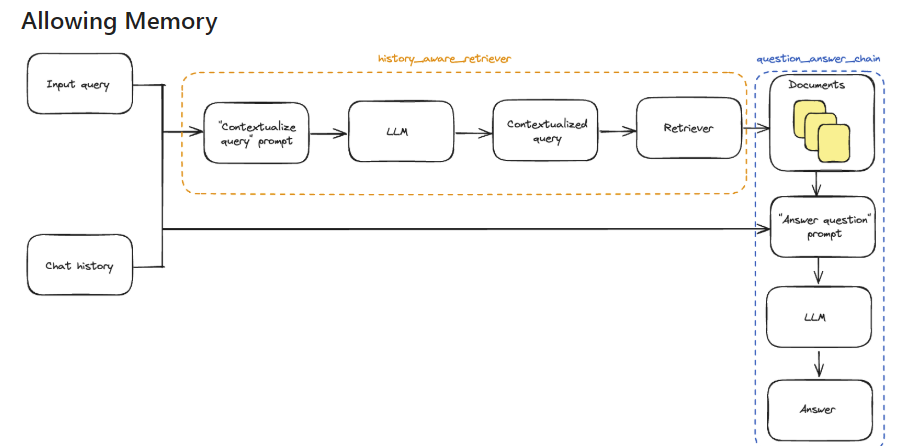

In [81]:

retriever_prompt = ("Given a chat history and the latest user question which might reference context in the chat history,"
    "formulate a standalone question which can be understood without the chat history."
    "Do NOT answer the question, just reformulate it if needed and otherwise return it as is."
    )

In [82]:
retriever = vstore.as_retriever(search_kwargs={"k": 3})

In [87]:
retriever

VectorStoreRetriever(tags=['AstraDBVectorStore', 'HuggingFaceInferenceAPIEmbeddings'], vectorstore=<langchain_astradb.vectorstores.AstraDBVectorStore object at 0x00000252C04536D0>, search_kwargs={'k': 3})

In [83]:
from langchain_core.prompts import ChatPromptTemplate

In [ ]:
contextualize_q_prompt = ChatPromptTemplate.from_messages(
    [
    ("system", retriever_prompt),
    MessagesPlaceholder(variable_name="chat_history"),
    ("human", "{input}"),
    ]
)

In [88]:
contextualize_q_prompt

ChatPromptTemplate(input_variables=['chat_history', 'input'], input_types={'chat_history': list[typing.Annotated[typing.Union[typing.Annotated[langchain_core.messages.ai.AIMessage, Tag(tag='ai')], typing.Annotated[langchain_core.messages.human.HumanMessage, Tag(tag='human')], typing.Annotated[langchain_core.messages.chat.ChatMessage, Tag(tag='chat')], typing.Annotated[langchain_core.messages.system.SystemMessage, Tag(tag='system')], typing.Annotated[langchain_core.messages.function.FunctionMessage, Tag(tag='function')], typing.Annotated[langchain_core.messages.tool.ToolMessage, Tag(tag='tool')], typing.Annotated[langchain_core.messages.ai.AIMessageChunk, Tag(tag='AIMessageChunk')], typing.Annotated[langchain_core.messages.human.HumanMessageChunk, Tag(tag='HumanMessageChunk')], typing.Annotated[langchain_core.messages.chat.ChatMessageChunk, Tag(tag='ChatMessageChunk')], typing.Annotated[langchain_core.messages.system.SystemMessageChunk, Tag(tag='SystemMessageChunk')], typing.Annotated[l

In [ ]:
history_aware_retriever = create_history_aware_retriever(model, retriever, contextualize_q_prompt)

In [93]:
history_aware_retriever

RunnableBinding(bound=RunnableBranch(branches=[(RunnableLambda(lambda x: not x.get('chat_history', False)), RunnableLambda(lambda x: x['input'])
| VectorStoreRetriever(tags=['AstraDBVectorStore', 'HuggingFaceInferenceAPIEmbeddings'], vectorstore=<langchain_astradb.vectorstores.AstraDBVectorStore object at 0x00000252C04536D0>, search_kwargs={'k': 3}))], default=ChatPromptTemplate(input_variables=['chat_history', 'input'], input_types={'chat_history': list[typing.Annotated[typing.Union[typing.Annotated[langchain_core.messages.ai.AIMessage, Tag(tag='ai')], typing.Annotated[langchain_core.messages.human.HumanMessage, Tag(tag='human')], typing.Annotated[langchain_core.messages.chat.ChatMessage, Tag(tag='chat')], typing.Annotated[langchain_core.messages.system.SystemMessage, Tag(tag='system')], typing.Annotated[langchain_core.messages.function.FunctionMessage, Tag(tag='function')], typing.Annotated[langchain_core.messages.tool.ToolMessage, Tag(tag='tool')], typing.Annotated[langchain_core.me

In [90]:
PRODUCT_BOT_TEMPLATE = """
    Your ecommercebot bot is an expert in product recommendations and customer queries.
    It analyzes product titles and reviews to provide accurate and helpful responses.
    Ensure your answers are relevant to the product context and refrain from straying off-topic.
    Your responses should be concise and informative.

    CONTEXT:
    {context}

    QUESTION: {input}

    YOUR ANSWER:

    """

In [91]:

qa_prompt = ChatPromptTemplate.from_messages(
    [
        ("system", PRODUCT_BOT_TEMPLATE),
        MessagesPlaceholder(variable_name="chat_history"),
        ("human", "{input}")
    ]
)

In [94]:
qa_prompt

ChatPromptTemplate(input_variables=['chat_history', 'context', 'input'], input_types={'chat_history': list[typing.Annotated[typing.Union[typing.Annotated[langchain_core.messages.ai.AIMessage, Tag(tag='ai')], typing.Annotated[langchain_core.messages.human.HumanMessage, Tag(tag='human')], typing.Annotated[langchain_core.messages.chat.ChatMessage, Tag(tag='chat')], typing.Annotated[langchain_core.messages.system.SystemMessage, Tag(tag='system')], typing.Annotated[langchain_core.messages.function.FunctionMessage, Tag(tag='function')], typing.Annotated[langchain_core.messages.tool.ToolMessage, Tag(tag='tool')], typing.Annotated[langchain_core.messages.ai.AIMessageChunk, Tag(tag='AIMessageChunk')], typing.Annotated[langchain_core.messages.human.HumanMessageChunk, Tag(tag='HumanMessageChunk')], typing.Annotated[langchain_core.messages.chat.ChatMessageChunk, Tag(tag='ChatMessageChunk')], typing.Annotated[langchain_core.messages.system.SystemMessageChunk, Tag(tag='SystemMessageChunk')], typing.

In [ ]:
question_answer_chain = create_stuff_documents_chain(model, qa_prompt)   

In [114]:
question_answer_chain

RunnableBinding(bound=RunnableBinding(bound=RunnableAssign(mapper={
  context: RunnableLambda(format_docs)
}), kwargs={}, config={'run_name': 'format_inputs'}, config_factories=[])
| ChatPromptTemplate(input_variables=['chat_history', 'context', 'input'], input_types={'chat_history': list[typing.Annotated[typing.Union[typing.Annotated[langchain_core.messages.ai.AIMessage, Tag(tag='ai')], typing.Annotated[langchain_core.messages.human.HumanMessage, Tag(tag='human')], typing.Annotated[langchain_core.messages.chat.ChatMessage, Tag(tag='chat')], typing.Annotated[langchain_core.messages.system.SystemMessage, Tag(tag='system')], typing.Annotated[langchain_core.messages.function.FunctionMessage, Tag(tag='function')], typing.Annotated[langchain_core.messages.tool.ToolMessage, Tag(tag='tool')], typing.Annotated[langchain_core.messages.ai.AIMessageChunk, Tag(tag='AIMessageChunk')], typing.Annotated[langchain_core.messages.human.HumanMessageChunk, Tag(tag='HumanMessageChunk')], typing.Annotated[l

In [95]:

chain = create_retrieval_chain(history_aware_retriever, question_answer_chain)

In [96]:

chat_history = []

In [97]:

from langchain_community.chat_message_histories import ChatMessageHistory
from langchain_core.chat_history import BaseChatMessageHistory
from langchain_core.runnables.history import RunnableWithMessageHistory

In [106]:
store = {}

In [107]:
def get_session_history(session_id: str)-> BaseChatMessageHistory:
  if session_id not in store:
    store[session_id]= ChatMessageHistory()
  return store[session_id]

In [108]:

chain_with_memmory = RunnableWithMessageHistory(
    chain,
    get_session_history,
    input_messages_key="input",
    history_messages_key="chat_history",
    output_messages_key="answer",
)

In [109]:
chain_with_memmory.invoke(
   {"input": "can you tell me the best bluetooth buds?"},
    config={
        "configurable": {"session_id": "ss"}
    },  # constructs a key "abc123" in `store`.
)["answer"]

'Based on the review, the Realme Buds Bluetooth seems to be a top choice. The reviewer was impressed with its sound quality, battery life of up to 10 hours, and smooth design. The metal filters inside the buds also add to its quality.'

In [111]:
store

{'ss': InMemoryChatMessageHistory(messages=[HumanMessage(content='can you tell me the best bluetooth buds?', additional_kwargs={}, response_metadata={}), AIMessage(content='Based on the review, the Realme Buds Bluetooth seems to be a top choice. The reviewer was impressed with its sound quality, battery life of up to 10 hours, and smooth design. The metal filters inside the buds also add to its quality.', additional_kwargs={}, response_metadata={})])}

In [112]:

chain_with_memmory.invoke(
   {"input": "what is my previous question?"},
    config={
        "configurable": {"session_id": "ss"}
    },  # constructs a key "abc123" in `store`.
)["answer"]

'Your previous question was "can you tell me the best bluetooth buds?"'

In [113]:
store

{'ss': InMemoryChatMessageHistory(messages=[HumanMessage(content='can you tell me the best bluetooth buds?', additional_kwargs={}, response_metadata={}), AIMessage(content='Based on the review, the Realme Buds Bluetooth seems to be a top choice. The reviewer was impressed with its sound quality, battery life of up to 10 hours, and smooth design. The metal filters inside the buds also add to its quality.', additional_kwargs={}, response_metadata={}), HumanMessage(content='what is my previous question?', additional_kwargs={}, response_metadata={}), AIMessage(content='Your previous question was "can you tell me the best bluetooth buds?"', additional_kwargs={}, response_metadata={})])}